# Grad stats 2 problem set 1

## 1. Set your current directory and download Charlie's dataset or your own data set using the "copy" command followed by "import delimited" or "use" depending on the format of your data [5 points]

In [16]:
copy "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/agilepredatorsdata20191116.csv" agilepredatrsdata20191116.csv
import delimited using "agilepredatorsdata20191116.csv", clear



(52 vars, 205,262 obs)


## 2. list all of the variable names in the dataset using the "ds" command with the appropriate varwidth specification [1 point]

In [17]:
ds, varwidth (32)

unitid                    idx_gr                    online                    chain                     grad_rate_150_p_w         pctchrtgrbkaat_w          pct4yrchrtgrbkaat_w       poacqu                    peswitcherall
year                      selective                 total_enrollment          investevent               grad_rate_150_p2yr_w      pctchrtgrwhitt_w          pct4yrchrtgrhispt_w       dist_pell_s               peswitchsystemall
iclevel                   systemid                  grtotltchrt4yr            pe_ind                    grad_rate_150_p4yr_w      pctchrtgrhispt_w          pct4yrchrtgrwhitt_w       dist_black_share_w        poswitcherall
idx_ef                    systemnm                  grtotltchrt2yr            po_ind                    all_under_w               pct2yrchrtgrbkaat_w       state_n                   dist_white_share_w        poswitchsystemall
idx_f                     ipo                       grtotltallgradchrt        inst_name_new             

## 3. Use the help magic to print the help documenation for the **"sum"** command. If you need information on the help magic, see here: https://nbviewer.jupyter.org/github/kylebarron/stata_kernel/blob/master/examples/Example.ipynb [1 pt]

In [18]:
%help summarize

This front-end cannot display HTML help.

## 4. Use the **"drop"** cmmand with an **if statement** to drop schools if they are **state**, **community**, or **non-proft** in the **owner_pe** variable. Use the "keep" command and an if statement to only keep observations if the year is 2014, then use the summarize command with the **"detail"** specification to summarize the variable **"dist_pell_s"**. This variable measures a school's Pell Grant revenue per student. If you are working with your own data, use the **drop, keep, and summarize** commands to narrow your dataset in some systematic way and summarize an **interval ratio** variable. [5 pts]
[Explain narrowing choices for your own dataset here, or interpret the meaning of the for-profit college narrowing here] 

**Narrowing for profit colleges allows to a deeper understanding of the predatory practices in higher education in that specific subset of institutions. Thus, it is possible to assess the common patterns of for-profit colleges toward indebteness and the distinctive features (and consequences) among the three different forms of private ownership.

In [19]:
tab owner_pe, nolabel m
drop if owner_pe == "State"
drop if owner_pe == "Non-profit"
drop if owner_pe == "Community"
keep if year==2014
sum dist_pell_s, detail



       owner_pe |      Freq.     Percent        Cum.
----------------+-----------------------------------
      Community |     41,264       20.10       20.10
     Non-profit |     66,188       32.25       52.35
 Private equity |      6,799        3.31       55.66
 Privately held |     59,220       28.85       84.51
Publicly traded |     11,559        5.63       90.14
          State |     20,232        9.86      100.00
----------------+-----------------------------------
          Total |    205,262      100.00

(20,232 observations deleted)

(66,188 observations deleted)

(41,264 observations deleted)

(73,937 observations deleted)


                         dist_pell_s
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%     1527.947              0
10%     2359.255              0       Obs               3,318
25%     3344.478              0       Sum of Wgt.       3,318

50%     4332.054                  

## 5. Create 1) a histogram and 2) a boxplot to visualize the distribution of Pell Grant revenue (or an interval ratio variable from your own dataset) in the following code cell. Then interpret the distributions in this markdown cell [3 pts]
[YOUR INTERPRETATION HERE]

**In 2014, the distribution of the Pell Grant Revenue Per Student among private colleges, either private equity, privately held and publicly traded was positively skewed (see histogram). The mean of this value among the aforementioned colleges was 5,125 US dollars. ost of the observations concentrated in the colleges in the second and third quartile of Pell Grant Reveny per student, above 3,334 dollars of this value and below 5,597 dollars (See boxplot).  


(bin=35, start=0, width=511.46116)


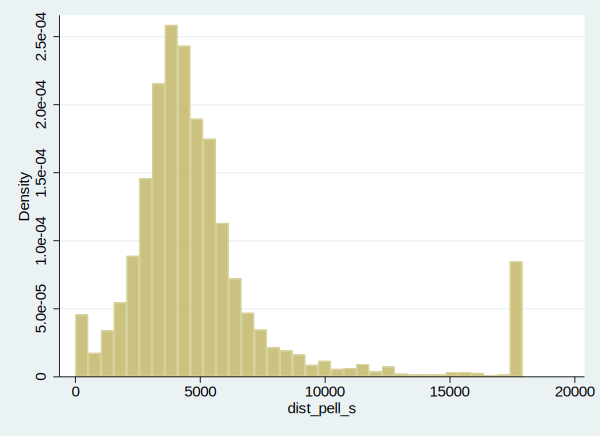

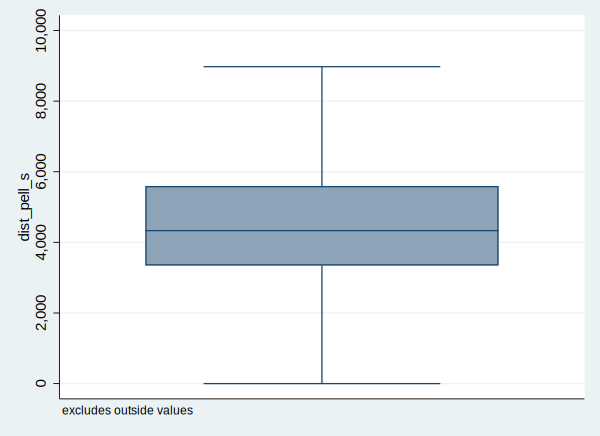

In [20]:
histogram dist_pell_s
graph box dist_pell_s, nooutsides

## 6. Students at for-profit colleges have especially poor graduation rates at 4-year degree schools. In Eaton(2020) and Eaton, Howell, & Yannelis (2019), I've argued argued that for-profit colleges are more predatory under publicly traded and private equity ownership. Based on this theory, write a hypothesis about the relationship between whether a school offers 4-year or lower degrees and for-profit college ownership. Explain what is the independent variable and dependent variable and why? If you are working with your own data, do the same for a relationship between two **nominal** variables in your data. [4 pts]
1. [YOUR HYPOTHESIS HERE] 
** If the property of a college is a private equity or equity ownership, then it is more likely to offer a high number of non-professional degrees. 
2. [YOUR EXPLANATION OF INDEPENDENT AND DEPENDENT VARIABLES HERE]

** Independent variable: as explanatory variable, the kind private property of colleges, publicly traded and private equity

** Dependent variable: as outcome, the type of degree offered based on the profesionalization time

## 7. Create a frequency table for colleges by their **level of degree offerings (iclevel)** and **ownership form (owner_pe)**. Make sure the dependent variable is listed first, making its values the row values. Stata doesn't like string variables, so use the commande **encode** with the **gen** specification to create encoded **iclevel2** and **owner_pe2** variables to use. If you are working with your own data, do the same for the two variables you hypothesized about. [3 pts]

In [21]:
encode iclevel, gen(iclevel2)
encode owner_pe, gen(owner_pe2)
codebook iclevel2
codebook owner_pe2
tab owner_pe2 iclevel2, m
tab owner_pe2 iclevel2, col chi





---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
iclevel2                                                                                                                                                                                                                                            (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (long)
                 label:  iclevel2

                 range:  [1,3]                        units:  1
         unique values:  3                        missing .:  0/3,641

            tabul

## 7. Create a horizontal bar graph using the **graph hbar** command with the **over** specification to plot the percentage of schools with degree levels within each ownership form. Use the **xi** command with the **noomit** option to create a dummy variable for iclevel. Do the same with your variables of interest if you are using your own data. [3 pts]



                            iclevel |      Freq.     Percent        Cum.
------------------------------------+-----------------------------------
   At least 2 but less than 4 years |      1,060       29.11       29.11
                 Four or more years |        790       21.70       50.81
Less than 2 years (below associate) |      1,791       49.19      100.00
------------------------------------+-----------------------------------
                              Total |      3,641      100.00


   iclevel2 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      1,060       29.11       29.11
          2 |        790       21.70       50.81
          3 |      1,791       49.19      100.00
------------+-----------------------------------
      Total |      3,641      100.00


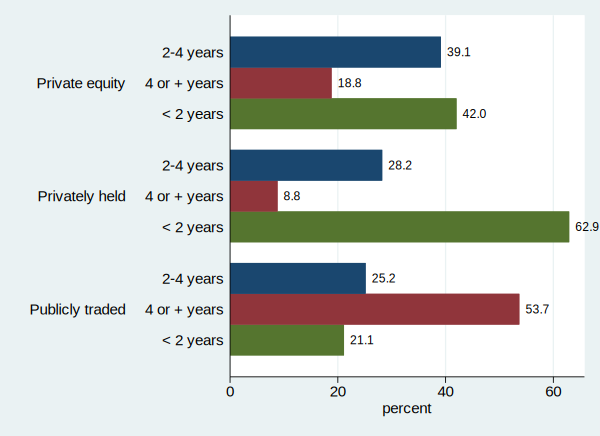

In [22]:
tab iclevel, m
tab iclevel2, nol m
xi i.iclevel2, noomit
graph hbar _Iiclevel2_*, over (owner_pe2) label percentages legend(off) blabel(bar, format(%9.1f)) showyvars yvaroptions(relabel(1 "2-4 years" 2 "4 or + years" 3 "< 2 years"))

## 8. Provide your interpretation of the results from the bivariate frequency table and the bar graph. Is there a relationship between ownership form and offering higher degrees? Or in your own variables if using your own data? What is the relationship in your own words, and does it fit your hypothesis?
[YOUR INTERPRETATION HERE]

**As expressed in the bivariate table, in absolute terms, for each title category, publicly traded and private equity for profit colleges combined were less than quarter of less titles of less than two years, while privately held represented a majority of 76.6 percent of them. In addition, in titles of more than 2 years but less than 4, both publicly traded and private equity represented less than half, in contrast to the 58% represented by privately held colleges. Moreover, publicly traded companies equaled to 62.66 percent of titles of 4 years or more.  

**In relative terms, shown in the graph, for each category of ownership,less than two years represented a majority of the titles yielded by private equities (42 percent), whlist they are minority publicly traded colleges (21 percent). In both cases, titles of more than 2 years and less than 4 held a middle spot (39 and 25 percent). 

**In consequence, the evidence does not support our hypothesis that publicly traded and private equity for profit colleged were more likely to offer non professional degrees. 

## 9. Private equity and publicly traded ownership may lead to more predation. But privately held colleges can be predatory too. Within each ownership form, those colleges that are operated by chains may also be more likely to be predatory. Use the **chain** variable to generate another set of bivariate tables and bargraphs for **degree level (iclevel)** and **chain ownership** and for **chain ownership (chain)** and **ownership form (owner_pe)**. Do the same if you think there is another intervening variable in your own data. Then report your interpretation [5 pts]
[YOUR INTERPRETATION HERE]

**While exploring for the weight of chains in the professionalization degrees by their time or by ownership, the results were not conclusive to indicate a greater degree of predatory practices. In terms of the years of degree, the first bivariate table and the first graph show that chained manage colleges offered titles of less than two years, 4 or more years and 2 to 4 years represented almost in an even manner, representing one third each. And in not chained managed colleges, titles of less than two years were a majority of 66 percent. The second bivariate table and also the second graph, in consequence with the previous results, expresses that the vast majority of publicly held or private equity for-profit colleges were operated by a chain, in contrast to the 21 percent of privately held colleges.



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
chain                                                                                                                                                                                                                                               (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (byte)

                 range:  [0,1]                        units:  1
         unique values:  2                        missing .:  0/3,641

            tabulation:  Freq.  Value
               

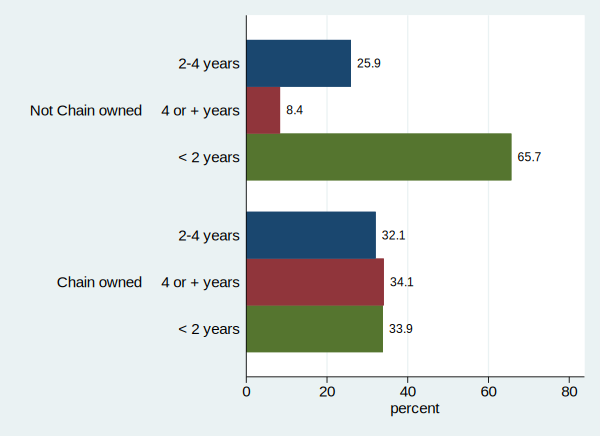

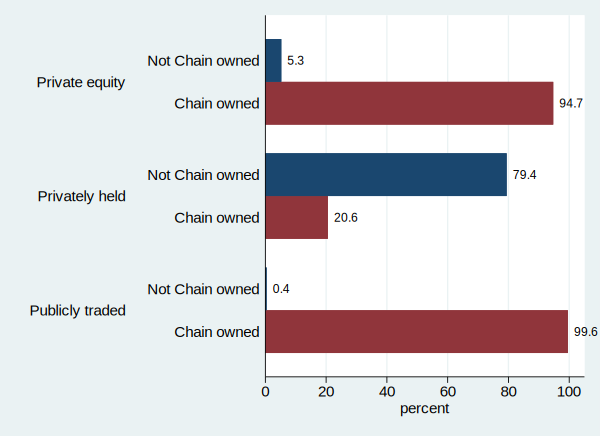

In [23]:
codebook chain
tab chain
label define chain 0 "Not Chain owned" 1 "Chain owned"
label values chain chain
tab iclevel2 chain, column chi m
tab chain owner_pe2, column chi m
xi i.iclevel2, noomit
graph hbar _Iiclevel2_*, over (chain) label percentages legend(off) blabel(bar, format(%9.1f)) showyvars yvaroptions(relabel(1 "2-4 years" 2 "4 or + years" 3 "< 2 years"))
xi i.chain, noomit
graph hbar _Ichain_*, over (owner_pe2) label percentages legend(off) blabel(bar, format(%9.1f)) showyvars yvaroptions(relabel(1 "Not Chain owned" 2 "Chain owned"))

## 10. Lastly, use **chain ownership** or the relevant variable for your own data as a control variable by 1) adding the specification "bysort iclevel:" before the "tab command" and 2) adding a "by(iclevel)" specification to the end of the graph command. Interpret the results [5 pts]
[YOUR INTERPRETATION HERE]
**Holding not managed by chain as a constant, the previous trends became more apparent. According to the first table and graph, again there is a lack of association of publicly held and private equity for profit colleges with low level degrees. In the first case, only one tenth of the titles were of less than 2 years and one third between 2 and 4. While in publicly held not managed by a chain, all were high level titles of 4 or more years. In contrast, titles of less than two years were a majority (67 percent) in privately held colleges, even when not managed by a chain.

**In the second table and graph, holding managed by a chain as a constant, the results expose that titles of less than two years did represented a majority for private equities (44 percent) although they were a minority for publicly traded colleges (21 percent). In privately held colleges, the majority of titles were also of less than two years (48 percent). In the three types of for profit colleges, titles of more than two and less than four years occupied a second place between one third and one forth of the titles. And a majority of publicly traded colleges managed by a chain offered high degree titles of 4 or more years. In consequence, chain ownership presents an effect of increasing predatory practices in private equities and publicly traded colleges, although in privately held colleges the effect is the opposite. 



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> chain = Not Chain owned

+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

                      |            owner_pe2
             iclevel2 | Private e  Privately  Publicly  |     Total
----------------------+---------------------------------+----------
At least 2 but less t |        11        444          0 |       455 
                      |     37.93      25.80       0.00 |     25.94 
----------------------+---------------------------------+----------
   Four or more years |        14        129          4 |       147 
                      |     48.28       7.50     100.00 |      8.38 
----------------------+---------------------------------

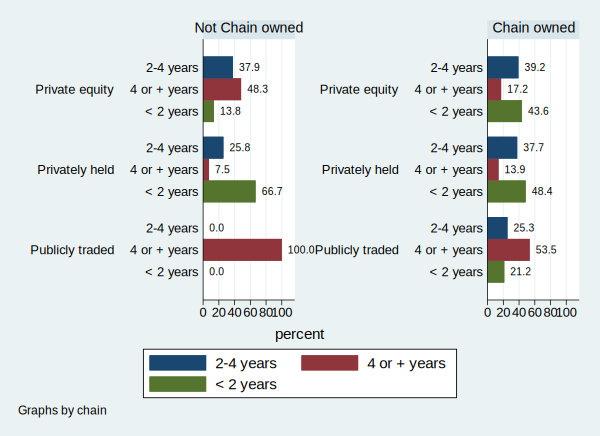

In [25]:
bysort chain: tab iclevel2 owner_pe2, column chi
xi i.iclevel2, noomit
graph hbar _Iiclevel2_*, label percentages legend(off) blabel(bar, format(%9.1f)) showyvars yvaroptions(relabel(1 "2-4 years" 2 "4 or + years" 3 "< 2 years")) over (owner_pe2) by(chain)